# **Вариант 3**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy.stats import spearmanr, pearsonr

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/autos.csv', on_bad_lines='warn')

In [ ]:
df

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TЬRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371523,2016-03-14 17:48:27,Suche_t4___vito_ab_6_sitze,privat,Angebot,2200,test,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,2016-03-14 00:00:00,0,39576,2016-04-06 00:46:52
371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,privat,Angebot,1199,test,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein,2016-03-05 00:00:00,0,26135,2016-03-11 18:17:12
371525,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Angebot,9200,test,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein,2016-03-19 00:00:00,0,87439,2016-04-07 07:15:26
371526,2016-03-20 19:41:08,VW_Golf_Kombi_1_9l_TDI,privat,Angebot,3400,test,kombi,2002,manuell,100,golf,150000,6,diesel,volkswagen,NaN,2016-03-20 00:00:00,0,40764,2016-03-24 12:45:21


# **Перевод столбцов с датами и числами к соответствующему типу данных для последующей работы**

In [ ]:
dt_columns = ['dateCrawled', 'dateCreated', 'lastSeen']
num_columns = ['price', 'yearOfRegistration', 'powerPS', 'kilometer', 'monthOfRegistration', 'nrOfPictures']
str_columns = [i for i in list(df) if i not in dt_columns+num_columns]

In [ ]:
for column in dt_columns:
  df[column] = pd.to_datetime(df[column], errors='coerce')

In [ ]:
for column in num_columns:
  df[column] = pd.to_numeric(df[column], errors='coerce')

# **head()**

In [ ]:
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TЬRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31,0,60437,2016-04-06 10:17:21


# **tail()**

In [ ]:
df.tail()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
371523,2016-03-14 17:48:27,Suche_t4___vito_ab_6_sitze,privat,Angebot,2200,test,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,2016-03-14,0,39576,2016-04-06 00:46:52
371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,privat,Angebot,1199,test,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein,2016-03-05,0,26135,2016-03-11 18:17:12
371525,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Angebot,9200,test,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein,2016-03-19,0,87439,2016-04-07 07:15:26
371526,2016-03-20 19:41:08,VW_Golf_Kombi_1_9l_TDI,privat,Angebot,3400,test,kombi,2002,manuell,100,golf,150000,6,diesel,volkswagen,NaN,2016-03-20,0,40764,2016-03-24 12:45:21
371527,2016-03-07 19:39:19,BMW_M135i_vollausgestattet_NP_52.720____Euro,privat,Angebot,28990,control,limousine,2013,manuell,320,m_reihe,50000,8,benzin,bmw,nein,2016-03-07,0,73326,2016-03-22 03:17:10


# **info()**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   dateCrawled          371528 non-null  datetime64[ns]
 1   name                 371528 non-null  object        
 2   seller               371528 non-null  object        
 3   offerType            371528 non-null  object        
 4   price                371528 non-null  int64         
 5   abtest               371528 non-null  object        
 6   vehicleType          333659 non-null  object        
 7   yearOfRegistration   371528 non-null  int64         
 8   gearbox              351319 non-null  object        
 9   powerPS              371528 non-null  int64         
 10  model                351044 non-null  object        
 11  kilometer            371528 non-null  int64         
 12  monthOfRegistration  371528 non-null  int64         
 13  fuelType      

# **describe()**

In [ ]:
df.describe()

,dateCrawled,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,dateCreated,nrOfPictures,postalCode,lastSeen
count,371528,3.715280e+05,371528.000000,371528.000000,371528.000000,371528.000000,371528,371528.0,371528.00000,371528
mean,2016-03-21 13:30:31.202717184,1.729514e+04,2004.577997,115.549477,125618.688228,5.734445,2016-03-20 19:42:51.495015168,0.0,50820.66764,2016-03-30 03:37:50.548152832
min,2016-03-05 14:06:22,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,2014-03-10 00:00:00,0.0,1067.00000,2016-03-05 14:15:08
25%,2016-03-13 12:51:46.500000,1.150000e+03,1999.000000,70.000000,125000.000000,3.000000,2016-03-13 00:00:00,0.0,30459.00000,2016-03-23 11:32:10.500000
50%,2016-03-21 18:36:22,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,2016-03-21 00:00:00,0.0,49610.00000,2016-04-03 23:17:15
75%,2016-03-29 14:49:31.249999872,7.200000e+03,2008.000000,150.000000,150000.000000,9.000000,2016-03-29 00:00:00,0.0,71546.00000,2016-04-06 10:45:02
max,2016-04-07 14:36:58,2.147484e+09,9999.000000,20000.000000,150000.000000,12.000000,2016-04-07 00:00:00,0.0,99998.00000,2016-04-07 14:58:51
std,NaN,3.587954e+06,92.866598,192.139578,40112.337051,3.712412,NaN,0.0,25799.08247,NaN


# **Работа с пустыми значениями**

In [ ]:
print('Кол-во пустых значений по столбцам (отсортировано):')
nas = dict()
for column in df:
  nas[column] = df[column].isna().sum()
nas = sorted(nas.items(), key=lambda item: item[1])
for i in nas:
  print(f'{i[0]}: {int(i[1])}')

Кол-во пустых значений по столбцам (отсортировано):
dateCrawled: 0
name: 0
seller: 0
offerType: 0
price: 0
abtest: 0
yearOfRegistration: 0
powerPS: 0
kilometer: 0
monthOfRegistration: 0
brand: 0
dateCreated: 0
nrOfPictures: 0
postalCode: 0
lastSeen: 0
gearbox: 20209
model: 20484
fuelType: 33386
vehicleType: 37869
notRepairedDamage: 72060


In [ ]:
nas_prc = nas
print('Процент пустых значений от общего количество строк: ')
for i in nas_prc:
  print(f'{i[0]}: {i[1]/len(df[i[0]]): .3f}%')

Процент пустых значений от общего количество строк: 
dateCrawled:  0.000%
name:  0.000%
seller:  0.000%
offerType:  0.000%
price:  0.000%
abtest:  0.000%
yearOfRegistration:  0.000%
powerPS:  0.000%
kilometer:  0.000%
monthOfRegistration:  0.000%
brand:  0.000%
dateCreated:  0.000%
nrOfPictures:  0.000%
postalCode:  0.000%
lastSeen:  0.000%
gearbox:  0.054%
model:  0.055%
fuelType:  0.090%
vehicleType:  0.102%
notRepairedDamage:  0.194%


In [ ]:
print('Данные info() до очистки пустых значений:')
df.info()

Данные info() до очистки пустых значений:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   dateCrawled          371528 non-null  datetime64[ns]
 1   name                 371528 non-null  object        
 2   seller               371528 non-null  object        
 3   offerType            371528 non-null  object        
 4   price                371528 non-null  int64         
 5   abtest               371528 non-null  object        
 6   vehicleType          333659 non-null  object        
 7   yearOfRegistration   371528 non-null  int64         
 8   gearbox              351319 non-null  object        
 9   powerPS              371528 non-null  int64         
 10  model                351044 non-null  object        
 11  kilometer            371528 non-null  int64         
 12  monthOfRegistration  371528 no

In [ ]:
print(f'Изначальная длина датафрейма: {len(df)}')
df1 = df.dropna()
print(f'Произведено удаление строк с пустыми значениями. Текущая длина датафрейма: {len(df1)}')

Изначальная длина датафрейма: 371528
Произведено удаление строк с пустыми значениями. Текущая длина датафрейма: 260956


In [ ]:
print('Данные info() после очистки:')
df1.info()

Данные info() после очистки:
<class 'pandas.core.frame.DataFrame'>
Index: 260956 entries, 3 to 371527
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   dateCrawled          260956 non-null  datetime64[ns]
 1   name                 260956 non-null  object        
 2   seller               260956 non-null  object        
 3   offerType            260956 non-null  object        
 4   price                260956 non-null  int64         
 5   abtest               260956 non-null  object        
 6   vehicleType          260956 non-null  object        
 7   yearOfRegistration   260956 non-null  int64         
 8   gearbox              260956 non-null  object        
 9   powerPS              260956 non-null  int64         
 10  model                260956 non-null  object        
 11  kilometer            260956 non-null  int64         
 12  monthOfRegistration  260956 non-null  int64     

# **Удаление дубликатов**

In [ ]:
c = len(df.drop_duplicates()) - len(df)
df = df.drop_duplicates()
print(f'Дубликаты удалены. Количество найденных дубликатов: {-c}. Текущий размер датафрейма: {len(df)}')

Дубликаты удалены. Количество найденных дубликатов: 4. Текущий размер датафрейма: 371524


# **1. Заполнение пустых строковых значений значением 'unknown'**

In [ ]:
df[str_columns] = df[str_columns].fillna('unknown')

In [ ]:
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,unknown,1993,manuell,0,golf,150000,0,benzin,volkswagen,unknown,2016-03-24,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,unknown,125000,5,diesel,audi,ja,2016-03-24,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,unknown,2016-03-14,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TЬRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31,0,60437,2016-04-06 10:17:21


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 371524 entries, 0 to 371527
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   dateCrawled          371524 non-null  datetime64[ns]
 1   name                 371524 non-null  object        
 2   seller               371524 non-null  object        
 3   offerType            371524 non-null  object        
 4   price                371524 non-null  int64         
 5   abtest               371524 non-null  object        
 6   vehicleType          371524 non-null  object        
 7   yearOfRegistration   371524 non-null  int64         
 8   gearbox              371524 non-null  object        
 9   powerPS              371524 non-null  int64         
 10  model                371524 non-null  object        
 11  kilometer            371524 non-null  int64         
 12  monthOfRegistration  371524 non-null  int64         
 13  fuelType           

# **2. Диапазоны для числовых колонок**

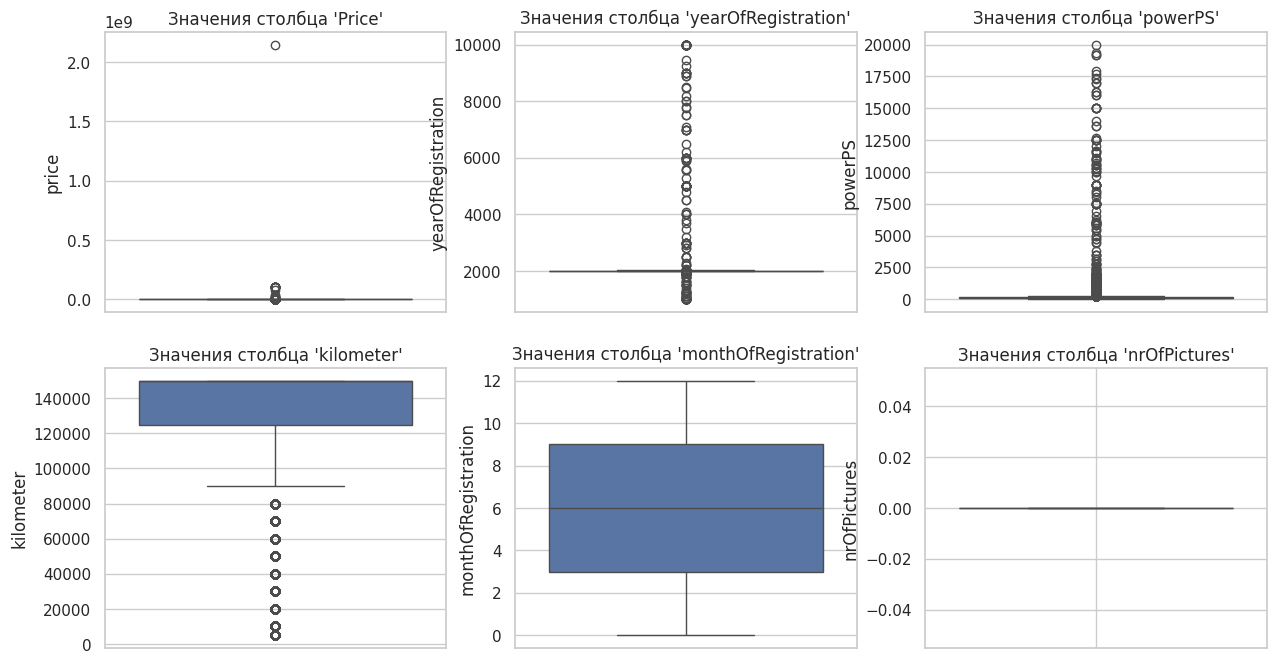

In [ ]:
plt.figure(figsize=(15, 8))  # Увеличим размер графика для лучшей читаемости
plt.subplot(2, 3, 1)
sns.boxplot(data=df['price'])
plt.title("Значения столбца 'Price'")
plt.subplot(2, 3, 2)
sns.boxplot(data=df['yearOfRegistration'])
plt.title("Значения столбца 'yearOfRegistration'")
plt.subplot(2, 3, 3)
sns.boxplot(data=df['powerPS'])
plt.title("Значения столбца 'powerPS'")
plt.subplot(2, 3, 4)
sns.boxplot(data=df['kilometer'])
plt.title("Значения столбца 'kilometer'")
plt.subplot(2, 3, 5)
sns.boxplot(data=df['monthOfRegistration'])
plt.title("Значения столбца 'monthOfRegistration'")
plt.subplot(2, 3, 6)
sns.boxplot(data=df['nrOfPictures'])
plt.title("Значения столбца 'nrOfPictures'")
plt.grid(True)
plt.show()

In [ ]:
min_vals = [df[i].min() for i in num_columns]
max_vals = [df[i].max() for i in num_columns]
all_columns = num_columns + dt_columns
# print(min_vals)
# print(max_vals)

In [ ]:
print('Разброс значений столбов:')
for i in range(len(min_vals)):
  print(f'{all_columns[i]}: {max_vals[i] - min_vals[i]}')

Разброс значений столбов:
price: 2147483647
yearOfRegistration: 8999
powerPS: 20000
kilometer: 145000
monthOfRegistration: 12
nrOfPictures: 0


# **3. Удаление выбросов**

In [ ]:
print('Удаление выбросовых значений')
print(f'Длина до удаления: {len(df)}')
cleaned_df = df
for i in num_columns:
  q1, q3 = cleaned_df[i].quantile([0.25, 0.75])
  iqr = q3 - q1
  bottom_limit, upper_limit = q1 - 1.5*iqr, q3 + 1.5*iqr
  cleaned_df = cleaned_df[(cleaned_df[i] >= bottom_limit) & (cleaned_df[i] <= upper_limit)]
print(f'Длина после удаления: {len(cleaned_df)}')

Удаление выбросовых значений
Длина до удаления: 371524
Длина после удаления: 285628


# **Диапазоны после удаления выбросов**

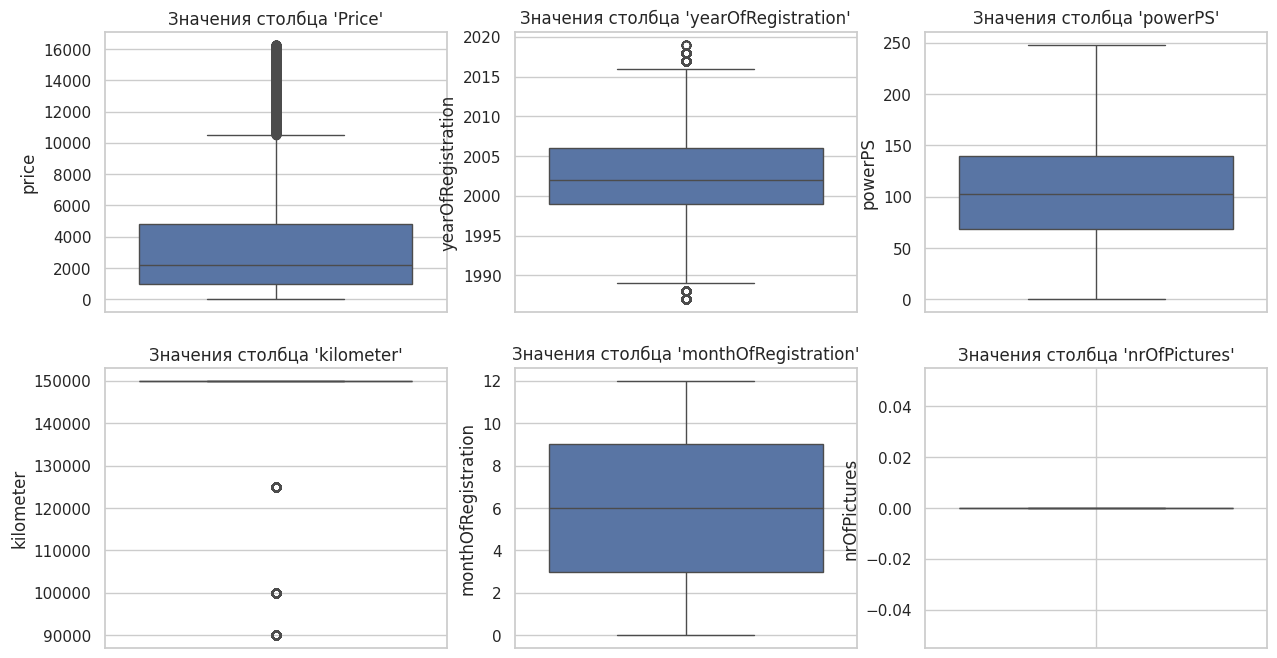

In [ ]:
plt.figure(figsize=(15, 8))  # Увеличим размер графика для лучшей читаемости
plt.subplot(2, 3, 1)
sns.boxplot(data=cleaned_df['price'])
plt.title("Значения столбца 'Price'")
plt.subplot(2, 3, 2)
sns.boxplot(data=cleaned_df['yearOfRegistration'])
plt.title("Значения столбца 'yearOfRegistration'")
plt.subplot(2, 3, 3)
sns.boxplot(data=cleaned_df['powerPS'])
plt.title("Значения столбца 'powerPS'")
plt.subplot(2, 3, 4)
sns.boxplot(data=cleaned_df['kilometer'])
plt.title("Значения столбца 'kilometer'")
plt.subplot(2, 3, 5)
sns.boxplot(data=cleaned_df['monthOfRegistration'])
plt.title("Значения столбца 'monthOfRegistration'")
plt.subplot(2, 3, 6)
sns.boxplot(data=cleaned_df['nrOfPictures'])
plt.title("Значения столбца 'nrOfPictures'")
plt.grid(True)
plt.show()

In [ ]:
min_vals = [cleaned_df[i].min() for i in num_columns]
max_vals = [cleaned_df[i].max() for i in num_columns]
all_columns = num_columns + dt_columns
# print(min_vals)
# print(max_vals)

In [ ]:
print('Разброс значений столбов:')
for i in range(len(min_vals)):
  print(f'{all_columns[i]}: {max_vals[i] - min_vals[i]}')

Разброс значений столбов:
price: 16270
yearOfRegistration: 32
powerPS: 248
kilometer: 60000
monthOfRegistration: 12
nrOfPictures: 0


# **4. Тепловая матрица кореляций**

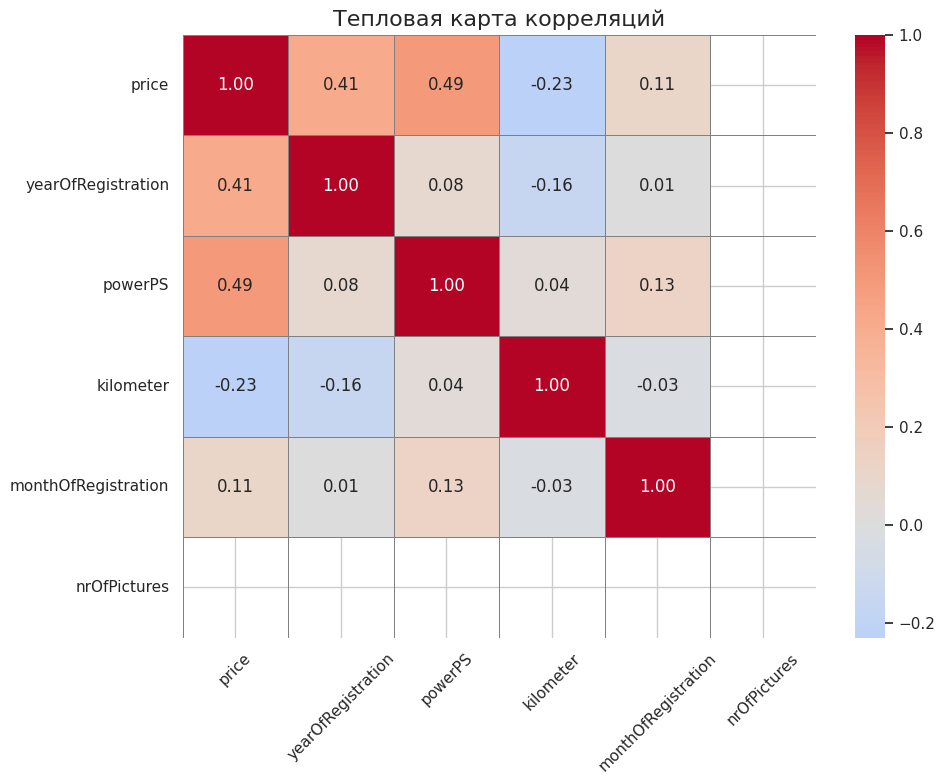

In [ ]:
# Вычисляем матрицу корреляций
corr_matrix = cleaned_df[num_columns].corr()

# Строим тепловую карту
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    linewidths=0.5,
    linecolor='gray'
)

# Настройка заголовка
plt.title("Тепловая карта корреляций", fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **5. Удаление столбцов**

In [ ]:
edited_df = cleaned_df
del edited_df['monthOfRegistration']
del edited_df['nrOfPictures']

# **6. Гистограммы машин по маркам, типам автомобиля и топлива**

In [ ]:
car_brands = dict()
car_types = dict()
fuel_types = dict()
for i in range(len(edited_df)):
  try:
    car_brands[edited_df['brand'][i]] += 1
  except KeyError:
    try:
      car_brands[edited_df['brand'][i]] = 1
    except KeyError:
      pass

  try:
    car_types[edited_df['vehicleType'][i]] += 1
  except KeyError:
    try:
      car_types[edited_df['vehicleType'][i]] = 1
    except KeyError:
      pass

  try:
    fuel_types[edited_df['fuelType'][i]] += 1
  except KeyError:
    try:
      fuel_types[edited_df['fuelType'][i]] = 1
    except KeyError:
      pass
car_brands = sorted(car_brands.items(), key=lambda item: item[1])
car_types = sorted(car_types.items(), key=lambda item: item[1])
fuel_types = sorted(fuel_types.items(), key=lambda item: item[1])
print(car_brands)
print(car_types)
print(fuel_types)

[('trabant', 42), ('lada', 45), ('porsche', 131), ('jaguar', 253), ('lancia', 305), ('land_rover', 307), ('dacia', 334), ('rover', 343), ('daewoo', 353), ('saab', 355), ('jeep', 409), ('subaru', 467), ('daihatsu', 503), ('chevrolet', 704), ('chrysler', 899), ('sonstige_autos', 1013), ('suzuki', 1226), ('kia', 1307), ('alfa_romeo', 1478), ('mini', 1487), ('honda', 1781), ('hyundai', 1793), ('mitsubishi', 1935), ('volvo', 2181), ('smart', 2485), ('toyota', 2649), ('nissan', 2966), ('skoda', 3105), ('citroen', 3134), ('mazda', 3607), ('seat', 4149), ('fiat', 5550), ('peugeot', 7027), ('renault', 11724), ('ford', 15586), ('audi', 18584), ('mercedes_benz', 19633), ('bmw', 23838), ('opel', 26031), ('volkswagen', 49559)]
[('andere', 1903), ('suv', 5966), ('coupe', 8972), ('cabrio', 11136), ('bus', 18633), ('unknown', 23681), ('kombi', 44427), ('kleinwagen', 47596), ('limousine', 56964)]
[('elektro', 15), ('andere', 66), ('hybrid', 85), ('cng', 366), ('lpg', 3373), ('unknown', 20293), ('diesel

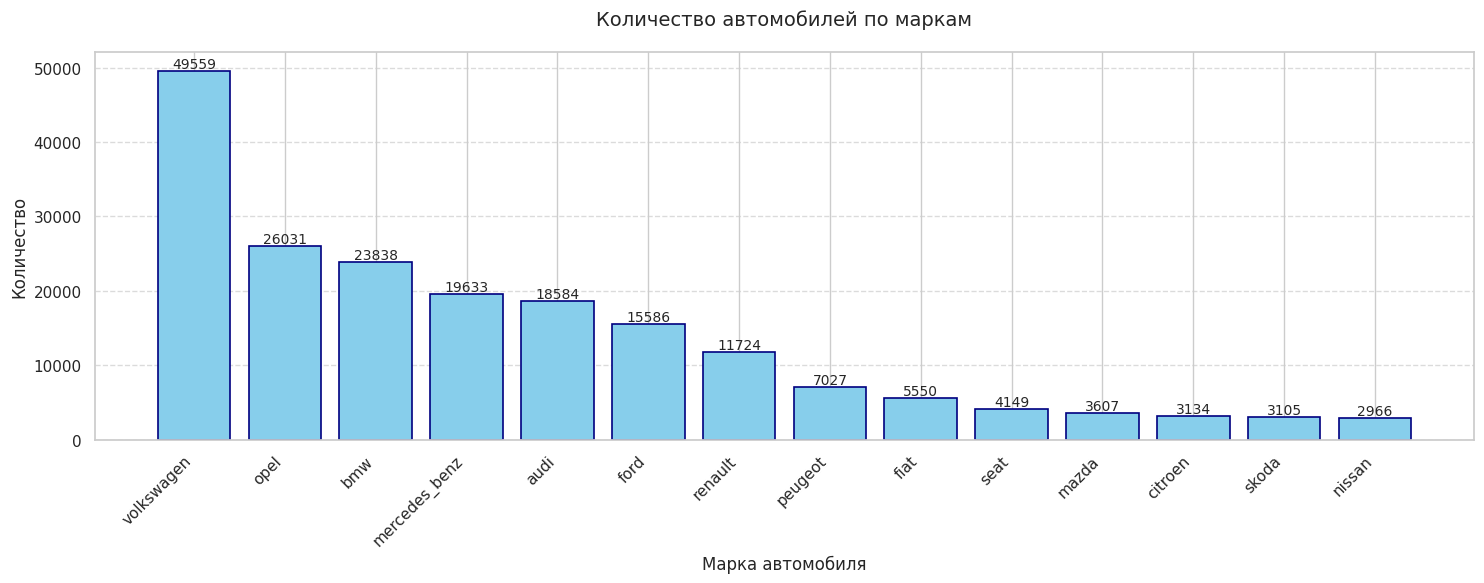

In [ ]:
data = car_brands[:-15:-1]

# Разделяем данные на отдельные списки для удобства
brands = [item[0] for item in data]
counts = [item[1] for item in data]

# Создаем фигуру
plt.figure(figsize=(15, 6))

# Строим столбчатую диаграмму (гистограмму категориальных данных)
bars = plt.bar(brands, counts, color='skyblue', edgecolor='navy', linewidth=1.2)

# Добавляем значения над столбцами
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height}',
             ha='center', va='bottom', fontsize=10)

# Настраиваем оформление
plt.title('Количество автомобилей по маркам', fontsize=14, pad=20)
plt.xlabel('Марка автомобиля', fontsize=12)
plt.ylabel('Количество', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Наклон подписей для лучшей читаемости
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Автоматическая подгонка layout
plt.tight_layout()

# Показать график
plt.show()

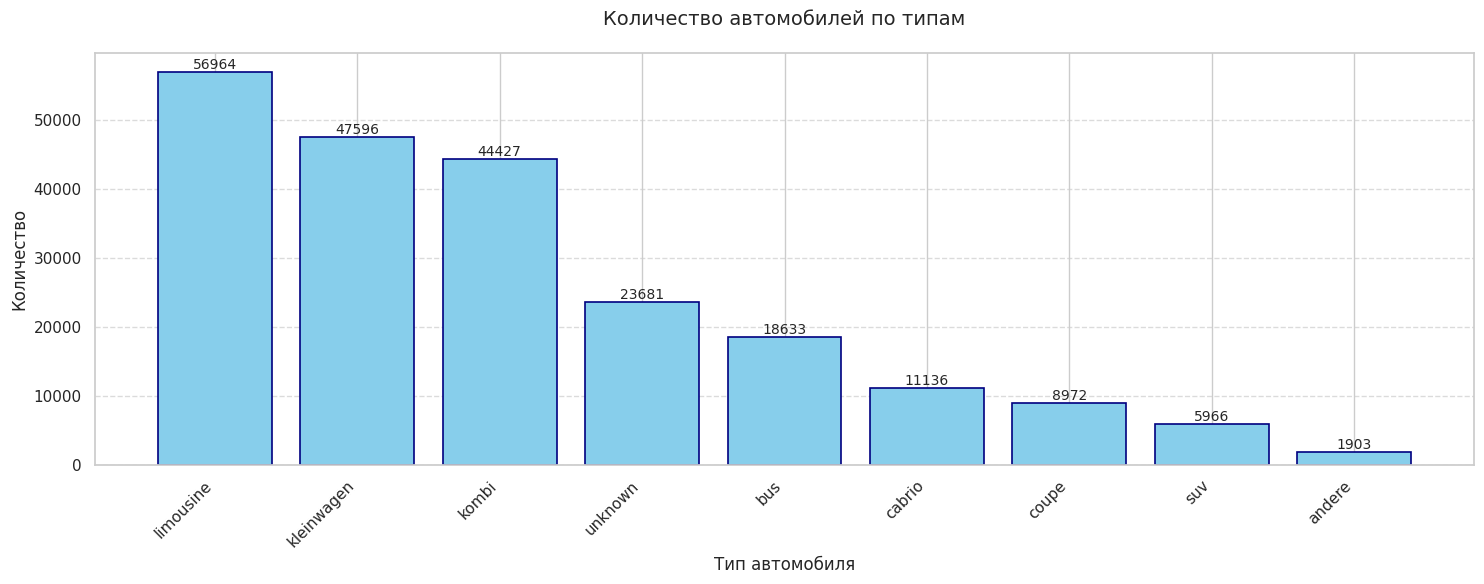

In [ ]:
data = car_types[:-15:-1]

# Разделяем данные на отдельные списки для удобства
brands = [item[0] for item in data]
counts = [item[1] for item in data]

# Создаем фигуру
plt.figure(figsize=(15, 6))

# Строим столбчатую диаграмму (гистограмму категориальных данных)
bars = plt.bar(brands, counts, color='skyblue', edgecolor='navy', linewidth=1.2)

# Добавляем значения над столбцами
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height}',
             ha='center', va='bottom', fontsize=10)

# Настраиваем оформление
plt.title('Количество автомобилей по типам', fontsize=14, pad=20)
plt.xlabel('Тип автомобиля', fontsize=12)
plt.ylabel('Количество', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Наклон подписей для лучшей читаемости
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Автоматическая подгонка layout
plt.tight_layout()

# Показать график
plt.show()

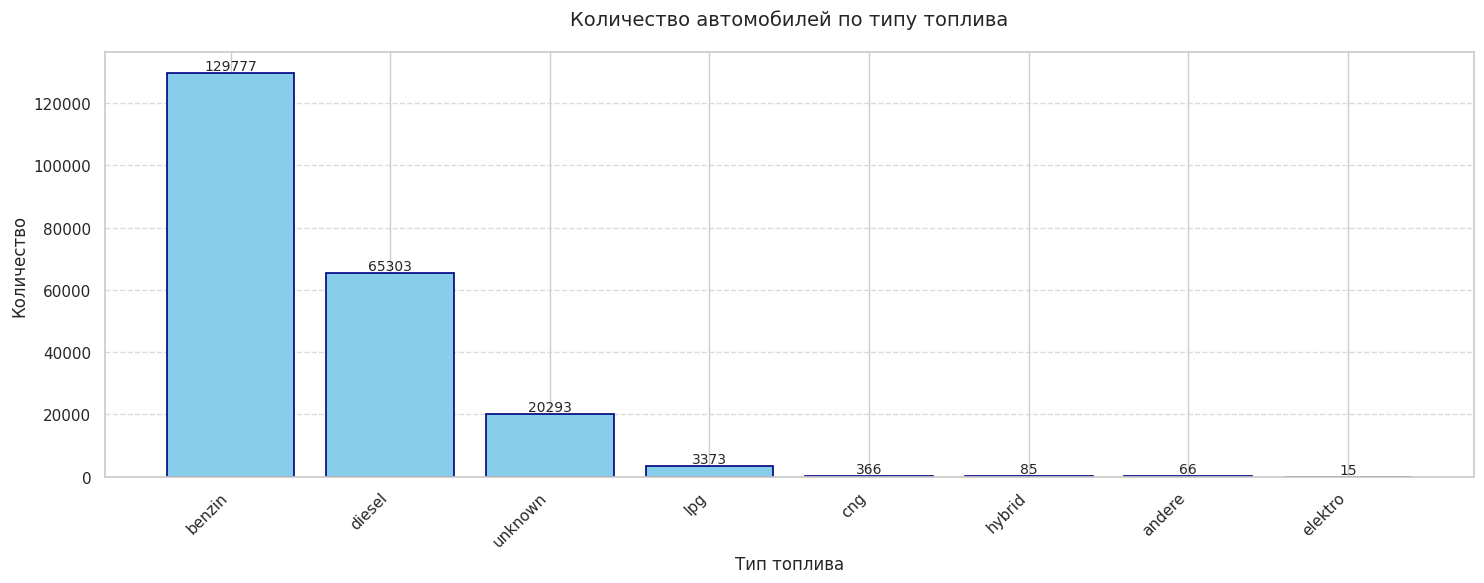

In [ ]:
data = fuel_types[:-15:-1]

# Разделяем данные на отдельные списки для удобства
brands = [item[0] for item in data]
counts = [item[1] for item in data]

# Создаем фигуру
plt.figure(figsize=(15, 6))

# Строим столбчатую диаграмму (гистограмму категориальных данных)
bars = plt.bar(brands, counts, color='skyblue', edgecolor='navy', linewidth=1.2)

# Добавляем значения над столбцами
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height}',
             ha='center', va='bottom', fontsize=10)

# Настраиваем оформление
plt.title('Количество автомобилей по типу топлива', fontsize=14, pad=20)
plt.xlabel('Тип топлива', fontsize=12)
plt.ylabel('Количество', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Наклон подписей для лучшей читаемости
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Автоматическая подгонка layout
plt.tight_layout()

# Показать график
plt.show()

# **7. Добавление нового столбца**

In [ ]:
name_length = []
for i in edited_df['name']:
  name_length.append(len(i))

In [ ]:
edited_df['nameLength'] = name_length
arr = ['name', 'nameLength']
edited_df[arr]

,name,nameLength
0,Golf_3_1.6,10
2,"Jeep_Grand_Cherokee_""Overland""",30
3,GOLF_4_1_4__3TЬRER,18
4,Skoda_Fabia_1.4_TDI_PD_Classic,30
5,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,50
...,...,...
371521,Opel_Zafira_1.6_Elegance_TЬV_12/16,34
371522,Mitsubishi_Cold,15
371524,Smart_smart_leistungssteigerung_100ps,37
371525,Volkswagen_Multivan_T4_TDI_7DC_UY2,34


# **8. Коэффиценты Пирсона и Спирмена**

In [ ]:
pearson_coef, pearson_p = pearsonr(edited_df['price'], edited_df['powerPS'])
print(f"Коэффициент Пирсона: {pearson_coef:.3f}, p-value: {pearson_p:.3f}")

spearman_coef, spearman_p = spearmanr(edited_df['price'], edited_df['powerPS'])
print(f"Коэффициент Спирмена: {spearman_coef:.3f}, p-value: {spearman_p:.3f}")

Коэффициент Пирсона: 0.495, p-value: 0.000
Коэффициент Спирмена: 0.527, p-value: 0.000


In [ ]:
arr = ['price', 'powerPS']
cleaned_df[arr]

,price,powerPS
0,480,0
2,9800,163
3,1500,75
4,3600,69
5,650,102
...,...,...
371521,1150,0
371522,0,0
371524,1199,101
371525,9200,102


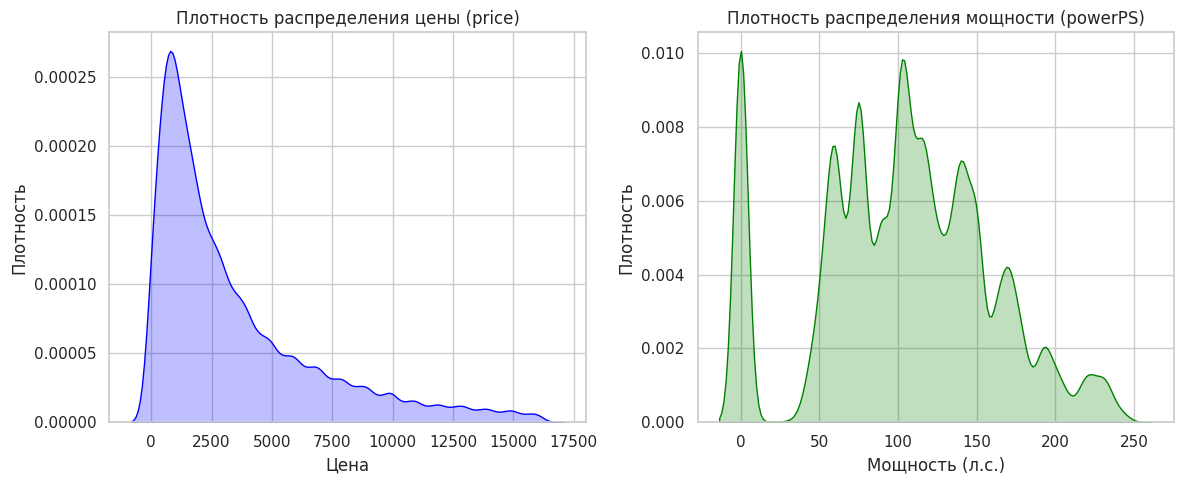

In [ ]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# График плотности для 'price'
sns.kdeplot(data=cleaned_df['price'], ax=axes[0], fill=True, color='blue')
axes[0].set_title('Плотность распределения цены (price)')
axes[0].set_xlabel('Цена')
axes[0].set_ylabel('Плотность')

# График плотности для 'powerPS'
sns.kdeplot(data=cleaned_df['powerPS'], ax=axes[1], fill=True, color='green')
axes[1].set_title('Плотность распределения мощности (powerPS)')
axes[1].set_xlabel('Мощность (л.с.)')
axes[1].set_ylabel('Плотность')

plt.tight_layout()
plt.show()